In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [30]:
# File to Load 
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

#city_data.head()
#ride_data.head()



In [33]:
#combine both data 
pyber = pd.merge(ride_data, city_data, on='city', how="left")
pyber.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


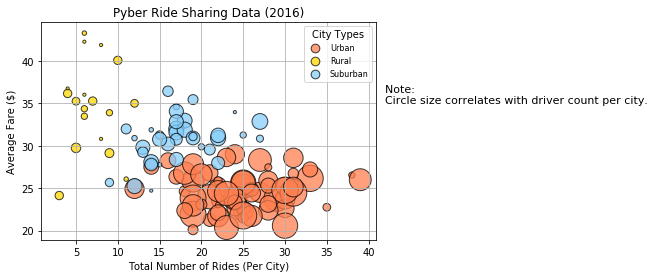

In [113]:
#Bubble Plot of Ride Sharing Data

# Data frames for the city type(urban,rural,suburban) and then group the data frames by city
urban_city = pyber[pyber["type"] == "Urban"].groupby([pyber["city"]])
rural_city = pyber[pyber["type"] == "Rural"].groupby([pyber["city"]])
suburban_city = pyber[pyber["type"] == "Suburban"].groupby([pyber["city"]])

#urban_city.head()
#rural_city.head()
#suburban_city.head()

# Calculations &scatter plots for each city types:

#urban calculations: ride count (x), fare average(y), driver count average size(z)

urban_x = urban_city["ride_id"].count()
urban_y = urban_city["fare"].mean()
urban_z = urban_city["driver_count"].mean()


#rural calculations: ride count (x), fare average(y), driver count average size(z)
rural_x = rural_city["ride_id"].count()
rural_y = rural_city["fare"].mean()
rural_z = rural_city["driver_count"].mean()

#suburban calculations: ride count (x), fare average(y), driver count average size(z)

suburban_x = suburban_city["ride_id"].count()
suburban_y = suburban_city["fare"].mean()
suburban_z = suburban_city["driver_count"].mean()


# Scatter plots for each city types

plt.scatter(urban_x, urban_y, label="Urban", s=urban_z * 10, color=["coral"], edgecolor="black",
            alpha = 0.75, marker="o")

plt.scatter(rural_x, rural_y, label="Rural", s=rural_z * 10, color=["gold"], edgecolor="black", 
            alpha = 0.75, marker="o")

plt.scatter(suburban_x, suburban_y, label="Suburban", s=suburban_z * 10, color=["lightskyblue"], edgecolor="black",
           alpha = 0.75, marker="o")

            
#labels on graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
            
            
#Legend for scatter plot
legend = plt.legend(fontsize= 8, title="City Types", loc="best")

#Adjusting sizes for the legend 
legend.legendHandles[0]._sizes = [75]
legend.legendHandles[1]._sizes = [75]
legend.legendHandles[2]._sizes = [75]


# Incorporate a text label regarding circle size
plt.text(42,35,"Note: \nCircle size correlates with driver count per city.", fontsize = 11)

# Show plot
plt.grid()
plt.show()


            
            








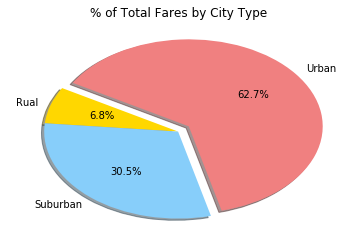

In [110]:
#Total Fares by City Type

# Calculation of the type percents
group_type = pyber.groupby(['type'])
sum_fare = group_type['fare'].sum()

#Chart Structure
labels = ["Rual", "Suburban", "Urban"]
exploed = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(sum_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")


# Show Figure
plt.show()


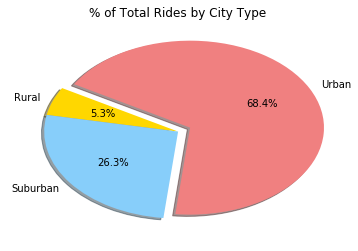

In [111]:
# Calculate Type Percents
ride_counts = group_type['ride_id'].count()

# Build Pie Chart
labels = ["Rural","Suburban","Urban"]
explode = (0, 0, 0.1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(ride_counts, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")


# Show Figure
plt.show()

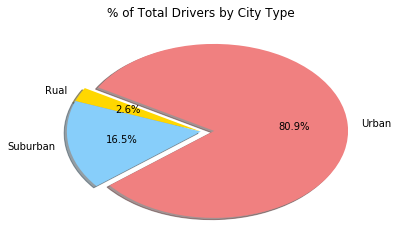

In [98]:
#Pie Chart structure 
labels = ["Rual", "Suburban", "Urban"]
explode = (0, 0, .1)
colors = ["gold", "lightskyblue", "lightcoral"]
plt.pie(drivers_sum, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers by City Type")



# Show Figure
plt.show()
